In [1]:
pip install imblearn

You should consider upgrading via the 'c:\users\st_hm\opencv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
df_raw = pd.read_csv(r'https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv')
df_raw

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,5586,Male,0.0,No,No,3.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,NaN,Mailed check,25.14,121.39,No
4544,4840,Male,0.0,No,No,7.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,200.74,647.14,Yes
4545,7587,Male,0.0,No,No,18.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),46.47,1500.07,No
4546,4176,Female,0.0,Yes,Yes,55.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),13.07,1375.42,No


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4548 non-null   int64  
 1   GENDER            4520 non-null   object 
 2   SENIORCITIZEN     4523 non-null   float64
 3   PARTNER           4524 non-null   object 
 4   DEPENDENTS        4526 non-null   object 
 5   TENURE            4533 non-null   float64
 6   PHONESERVICE      4520 non-null   object 
 7   MULTIPLELINES     4523 non-null   object 
 8   INTERNETSERVICE   4524 non-null   object 
 9   ONLINESECURITY    4518 non-null   object 
 10  ONLINEBACKUP      4518 non-null   object 
 11  DEVICEPROTECTION  4524 non-null   object 
 12  TECHSUPPORT       4530 non-null   object 
 13  STREAMINGTV       4523 non-null   object 
 14  STREAMINGMOVIES   4523 non-null   object 
 15  CONTRACT          4525 non-null   object 
 16  PAPERLESSBILLING  4517 non-null   object 


In [5]:
df_raw.apply( lambda x : x.unique().shape[0])

ID                  4548
GENDER                 3
SENIORCITIZEN          3
PARTNER                3
DEPENDENTS             3
TENURE                74
PHONESERVICE           3
MULTIPLELINES          4
INTERNETSERVICE        4
ONLINESECURITY         4
ONLINEBACKUP           4
DEVICEPROTECTION       4
TECHSUPPORT            4
STREAMINGTV            4
STREAMINGMOVIES        4
CONTRACT               4
PAPERLESSBILLING       3
PAYMENTMETHOD          5
MONTHLYCHARGES      4074
TOTALCHARGES        4496
CHURN                  2
dtype: int64

In [6]:
df_raw.isna().sum()

ID                   0
GENDER              28
SENIORCITIZEN       25
PARTNER             24
DEPENDENTS          22
TENURE              15
PHONESERVICE        28
MULTIPLELINES       25
INTERNETSERVICE     24
ONLINESECURITY      30
ONLINEBACKUP        30
DEVICEPROTECTION    24
TECHSUPPORT         18
STREAMINGTV         25
STREAMINGMOVIES     25
CONTRACT            23
PAPERLESSBILLING    31
PAYMENTMETHOD       28
MONTHLYCHARGES      21
TOTALCHARGES        21
CHURN                0
dtype: int64

In [7]:
df_raw.columns

Index(['ID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

'ID' -int64  

'GENDER' object  - 3

'SENIORCITIZEN', float64 - 3

'PARTNER', PARTNER    -3

'DEPENDENTS', object - 3 

'TENURE', float64 

'PHONESERVICE', object -3

'MULTIPLELINES', object -4

'INTERNETSERVICE',  object -4

'ONLINESECURITY', object -4

'ONLINEBACKUP', object -4

'DEVICEPROTECTION', object -4

'TECHSUPPORT',  object -4

'STREAMINGTV', object -4

'STREAMINGMOVIES',  object -4

'CONTRACT',  object -4

'PAPERLESSBILLING',  object -3

'PAYMENTMETHOD', object -5

'MONTHLYCHARGES', float64

'TOTALCHARGES',object - 4074

'CHURN', object - 2

In [8]:
df1 = df_raw.dropna()
df1

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6751,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),159.98,7190.78,No
4544,4840,Male,0.0,No,No,7.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,200.74,647.14,Yes
4545,7587,Male,0.0,No,No,18.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),46.47,1500.07,No
4546,4176,Female,0.0,Yes,Yes,55.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),13.07,1375.42,No


In [9]:
df1.apply( lambda x : x.unique().shape[0])

ID                  4106
GENDER                 2
SENIORCITIZEN          2
PARTNER                2
DEPENDENTS             2
TENURE                73
PHONESERVICE           2
MULTIPLELINES          3
INTERNETSERVICE        3
ONLINESECURITY         3
ONLINEBACKUP           3
DEVICEPROTECTION       3
TECHSUPPORT            3
STREAMINGTV            3
STREAMINGMOVIES        3
CONTRACT               3
PAPERLESSBILLING       2
PAYMENTMETHOD          4
MONTHLYCHARGES      3733
TOTALCHARGES        4081
CHURN                  2
dtype: int64

In [10]:
df1.columns

Index(['ID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [11]:
le = LabelEncoder()
aux1 = ['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD','CHURN']

for x in aux1:
    df1[x] = le.fit_transform(df1[x])
    df1[x] 

<ipython-input-11-60adf59e0b9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[x] = le.fit_transform(df1[x])


In [12]:
df1.dtypes

ID                    int64
GENDER                int32
SENIORCITIZEN         int64
PARTNER               int32
DEPENDENTS            int32
TENURE              float64
PHONESERVICE          int32
MULTIPLELINES         int32
INTERNETSERVICE       int32
ONLINESECURITY        int32
ONLINEBACKUP          int32
DEVICEPROTECTION      int32
TECHSUPPORT           int32
STREAMINGTV           int32
STREAMINGMOVIES       int32
CONTRACT              int32
PAPERLESSBILLING      int32
PAYMENTMETHOD         int32
MONTHLYCHARGES      float64
TOTALCHARGES         object
CHURN                 int32
dtype: object

In [13]:
df1.loc[df1['TOTALCHARGES'] ==  ' ']

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
1820,1281,1,0,1,1,0.0,1,0,2,1,...,1,1,1,1,1,1,3,37.37,,0
2835,9897,1,0,1,1,0.0,1,2,2,1,...,1,1,1,1,2,0,3,65.71,,0
4026,5512,0,0,1,1,0.0,1,0,2,1,...,1,1,1,1,2,0,3,54.01,,0


In [14]:
df1

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,0,0,0,0,26.0,1,0,0,0,...,2,0,0,0,0,1,1,131.55,1483.7,0
1,6865,1,0,0,0,39.0,1,2,1,0,...,0,0,0,0,0,1,1,79.61,2737.31,0
2,2799,1,0,0,0,1.0,1,0,2,1,...,1,1,1,1,0,0,1,9.26,9.26,0
3,1584,1,0,1,1,66.0,1,2,2,1,...,1,1,1,1,2,1,1,42.14,1689.19,0
4,9997,1,0,0,0,56.0,1,2,1,0,...,0,0,2,2,0,0,2,126.24,5608.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6751,0,0,1,1,72.0,1,2,1,0,...,2,2,0,2,2,1,0,159.98,7190.78,0
4544,4840,1,0,0,0,7.0,1,2,1,0,...,0,0,0,0,0,0,2,200.74,647.14,1
4545,7587,1,0,0,0,18.0,1,2,1,0,...,0,0,2,0,0,0,0,46.47,1500.07,0
4546,4176,0,0,1,1,55.0,1,2,2,1,...,1,1,1,1,2,1,1,13.07,1375.42,0


In [15]:
df1['TOTALCHARGES'] = pd.to_numeric(df1['TOTALCHARGES'],errors='coerce')

<ipython-input-15-316007180fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TOTALCHARGES'] = pd.to_numeric(df1['TOTALCHARGES'],errors='coerce')


In [16]:
df1['TOTALCHARGES'].astype(float)

0       1483.70
1       2737.31
2          9.26
3       1689.19
4       5608.69
         ...   
4542    7190.78
4544     647.14
4545    1500.07
4546    1375.42
4547    2012.00
Name: TOTALCHARGES, Length: 4106, dtype: float64

In [17]:
df1.isna().sum()

ID                  0
GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
PAPERLESSBILLING    0
PAYMENTMETHOD       0
MONTHLYCHARGES      0
TOTALCHARGES        3
CHURN               0
dtype: int64

In [18]:
df1= df1.dropna()
df1

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,0,0,0,0,26.0,1,0,0,0,...,2,0,0,0,0,1,1,131.55,1483.70,0
1,6865,1,0,0,0,39.0,1,2,1,0,...,0,0,0,0,0,1,1,79.61,2737.31,0
2,2799,1,0,0,0,1.0,1,0,2,1,...,1,1,1,1,0,0,1,9.26,9.26,0
3,1584,1,0,1,1,66.0,1,2,2,1,...,1,1,1,1,2,1,1,42.14,1689.19,0
4,9997,1,0,0,0,56.0,1,2,1,0,...,0,0,2,2,0,0,2,126.24,5608.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6751,0,0,1,1,72.0,1,2,1,0,...,2,2,0,2,2,1,0,159.98,7190.78,0
4544,4840,1,0,0,0,7.0,1,2,1,0,...,0,0,0,0,0,0,2,200.74,647.14,1
4545,7587,1,0,0,0,18.0,1,2,1,0,...,0,0,2,0,0,0,0,46.47,1500.07,0
4546,4176,0,0,1,1,55.0,1,2,2,1,...,1,1,1,1,2,1,1,13.07,1375.42,0


In [19]:
df1.isna().sum()

ID                  0
GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
PAPERLESSBILLING    0
PAYMENTMETHOD       0
MONTHLYCHARGES      0
TOTALCHARGES        0
CHURN               0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4103 non-null   int64  
 1   GENDER            4103 non-null   int32  
 2   SENIORCITIZEN     4103 non-null   int64  
 3   PARTNER           4103 non-null   int32  
 4   DEPENDENTS        4103 non-null   int32  
 5   TENURE            4103 non-null   float64
 6   PHONESERVICE      4103 non-null   int32  
 7   MULTIPLELINES     4103 non-null   int32  
 8   INTERNETSERVICE   4103 non-null   int32  
 9   ONLINESECURITY    4103 non-null   int32  
 10  ONLINEBACKUP      4103 non-null   int32  
 11  DEVICEPROTECTION  4103 non-null   int32  
 12  TECHSUPPORT       4103 non-null   int32  
 13  STREAMINGTV       4103 non-null   int32  
 14  STREAMINGMOVIES   4103 non-null   int32  
 15  CONTRACT          4103 non-null   int32  
 16  PAPERLESSBILLING  4103 non-null   int32  


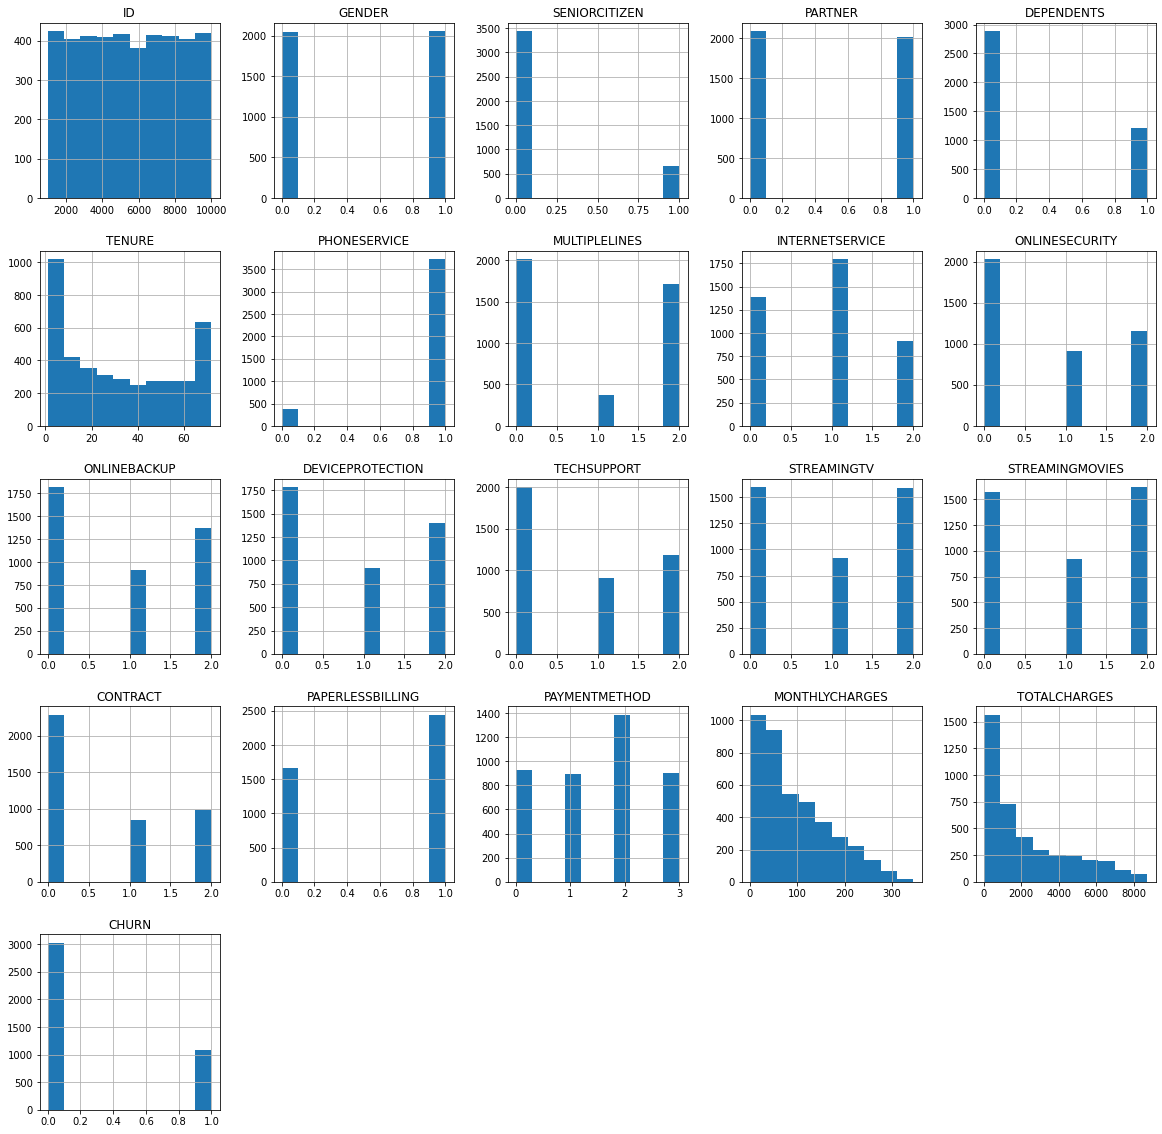

In [21]:
df1.hist(figsize=(20,20));

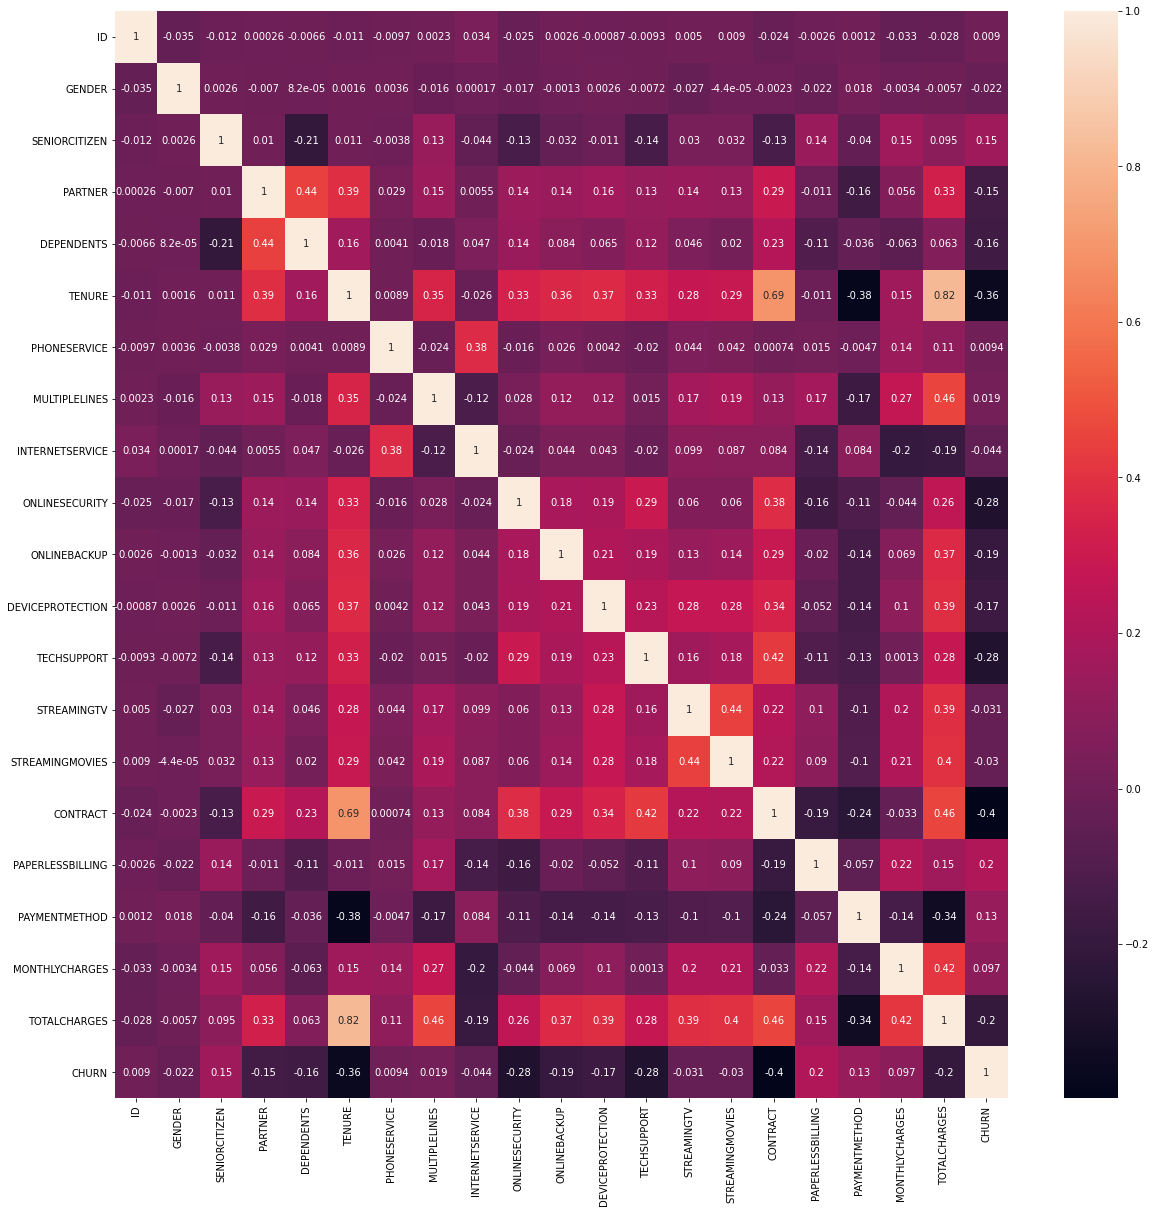

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(method='pearson'), annot=True);

In [23]:
df1.columns

Index(['ID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [24]:
seed = 42

In [25]:
# Split into training and test data

X = df1.drop('CHURN', axis=1)
y = df1['CHURN']

X_train_ST, X_test, y_train_ST, y_test = train_test_split(X, y, test_size=0.33, random_state=seed, stratify=y)

In [26]:
up_sampler = SMOTETomek(random_state=seed, n_jobs=-1)

X_train, y_train = up_sampler.fit_resample(X_train_ST, y_train_ST)

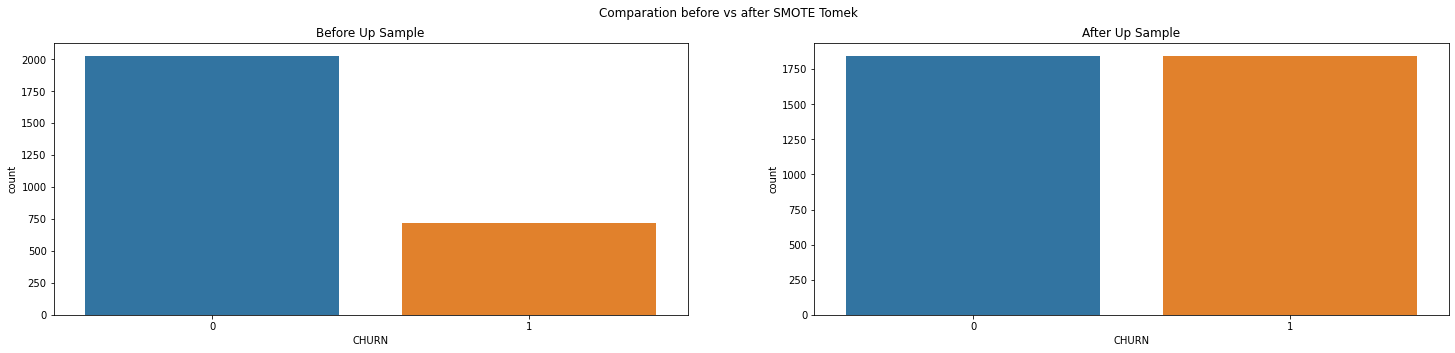

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(25,5))
# Aplica títulos aos gráficos
fig.suptitle('Comparation before vs after SMOTE Tomek')

axes[0].set_title('Before Up Sample')
ax1 = sns.countplot(ax=axes[0], x=y_train_ST)

axes[1].set_title('After Up Sample')
ax1 = sns.countplot(ax=axes[1], x=y_train)

In [28]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree Classifer (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Decision Tree Classifer (número de predições assertivas sobre número total de testes): 0.48655569782330343


In [29]:
## Logistic Regressions
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Logistic Regressions (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Logistic Regressions (número de predições assertivas sobre número total de testes): 0.5997638724911452


c:\users\st_hm\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Naive Bayes (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Naive Bayes (número de predições assertivas sobre número total de testes): 0.5995423340961099


In [31]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.39012345679012345


In [32]:
#Random Forest
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.563961485557084


In [33]:
estimator=[50,75,100,125,150,200]

for x in estimator:
    model = RandomForestClassifier(n_estimators= x, random_state=seed)
    model.fit(X_train, y_train) 

    y_pred = model.predict(X_test)
    acc = f1_score(y_test, y_pred)
    print(f"Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.5540166204986149
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.5625
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.563961485557084
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.5578231292517007
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.5506849315068493
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.5524861878453038


In [34]:
deep=[1,3,5,7,9]
for x in deep:
    model = RandomForestClassifier(n_estimators= 100, max_depth=x,random_state=seed)
    model.fit(X_train, y_train) 

    y_pred = model.predict(X_test)
    acc = f1_score(y_test, y_pred)
    print(f"Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.6155507559395248
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.6153846153846153
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.6148409893992933
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.6138613861386137
Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.6082603254067583


# Treiando a tabela resposta

In [35]:
df_answers = pd.read_csv(r'https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv')
df_answers

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,6946,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,51.71,90.81,TO_FILL
1,2228,Male,0,No,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),57.05,979.6,TO_FILL
2,3591,Male,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,No,Electronic check,235.56,6140.91,TO_FILL
3,1153,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,142.25,142.25,TO_FILL
4,5227,Male,0,No,No,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,105.40,1398.95,TO_FILL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5478,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.41,75.76,TO_FILL
1320,6297,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.51,6554.96,TO_FILL
1321,7952,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,227.81,6872.81,TO_FILL
1322,8473,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,7.33,747.88,TO_FILL


In [36]:
le = LabelEncoder()
aux1 = ['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD','CHURN']

for x in aux1:
    df_answers[x] = le.fit_transform(df_answers[x])
    df_answers[x] 

In [37]:
df_answers['TOTALCHARGES'] = pd.to_numeric(df_answers['TOTALCHARGES'],errors='coerce')

In [38]:
df_answers['TOTALCHARGES'].astype(float)

0         90.81
1        979.60
2       6140.91
3        142.25
4       1398.95
         ...   
1319      75.76
1320    6554.96
1321    6872.81
1322     747.88
1323    7102.24
Name: TOTALCHARGES, Length: 1324, dtype: float64

In [39]:
df_answers = df_answers.fillna(method='ffill')

In [40]:
X_answers = df_answers.drop('CHURN', axis=1)
y_answers = df_answers['CHURN']

X_train_ST_answers, X_test_answers, y_train_ST_answers, y_test_answers = train_test_split(X_answers, y_answers, test_size=0.25, random_state=seed, stratify=y_answers)

In [41]:
model = RandomForestClassifier(n_estimators= 100, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_answers)
acc = f1_score(y_answers, y_pred)

In [42]:
df_answers['CHURN'] = y_pred

In [43]:
df_answers.to_csv(r'Data\ANSWERS.csv')

In [44]:
df_answers

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,6946,0,0,0,0,3,1,0,2,1,...,1,1,1,1,0,0,2,51.71,90.81,0
1,2228,1,0,0,0,47,1,0,2,1,...,1,1,1,1,2,0,0,57.05,979.60,0
2,3591,1,0,1,0,62,1,2,1,2,...,0,0,0,2,1,0,2,235.56,6140.91,0
3,1153,1,0,0,1,1,1,2,1,0,...,0,0,0,0,0,1,2,142.25,142.25,1
4,5227,1,0,0,0,24,1,0,0,2,...,0,2,0,0,0,0,2,105.40,1398.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5478,1,0,0,0,4,1,0,2,1,...,1,1,1,1,0,0,3,23.41,75.76,0
1320,6297,1,0,1,1,63,1,2,1,0,...,2,0,2,2,2,1,0,62.51,6554.96,0
1321,7952,0,0,1,0,61,1,2,1,0,...,2,2,2,2,0,1,2,227.81,6872.81,1
1322,8473,1,0,0,0,11,1,0,1,0,...,0,0,0,0,0,0,2,7.33,747.88,1
